## Group 6 Mini-Project: Popular Spotify Songs

In [119]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [120]:
data = pd.read_csv('Popular_Spotify_Songs.csv', encoding='latin1')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

### Variables:

**track_name:** *name of the song* 

**artist(s)\_name:** *name of the artist* 

**streams:** *number of times the songs are played* --> numerical 

**released_year:** *year the song is released* --> numerical 

**danceability_%:** *how suitable a track is for dancing* --> percentage 

**valence_%:** *describes the musical positiveness conveyed by a track* --> percentage 

**energy_%:** *perceptual measure of intensity and activity* --> percentage 

**acousticness_%:** *whether the track is acoustic* --> percentage 

**instrumentalness_%:** *percentage of the song that doesn't contain vocals* --> percentage

**liveness_%:** *detects the presence of an audience in the recording* --> percentage

**speechiness_%:** *measures the presence of spoken words* --> percentage

In [121]:
data.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [122]:
# remove non-numeric values for streams
data['streams'] = pd.to_numeric(data['streams'], errors="coerce", downcast='integer')
data.dropna(subset=['streams'], inplace=True)

# sort in ascending order based on 'streams'
sorted_data = data.sort_values('streams')
sorted_data

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
123,Que Vuelvas,"Carin Leon, Grupo Frontera",2,2022,12,9,763,26,2.762000e+03,21,...,162,A#,Major,49,78,64,19,0,11,4
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",6,2022,12,22,138,4,1.365184e+06,13,...,105,G,Major,82,62,74,10,0,33,7
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",3,2023,7,13,437,31,1.159939e+07,17,...,97,NaN,Major,79,92,89,5,0,6,5
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",2,2023,6,1,293,8,1.195664e+07,5,...,133,B,Minor,93,68,65,42,0,12,25
68,Overdrive,Post Malone,1,2023,7,14,410,36,1.478042e+07,36,...,140,C#,Major,56,48,73,0,0,35,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2,2018,10,9,24094,78,2.808097e+09,372,...,90,D,Major,76,91,50,54,0,7,5
620,Dance Monkey,Tones and I,1,2019,5,10,24529,0,2.864792e+09,533,...,98,F#,Minor,82,54,59,69,0,18,10
86,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3
179,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8


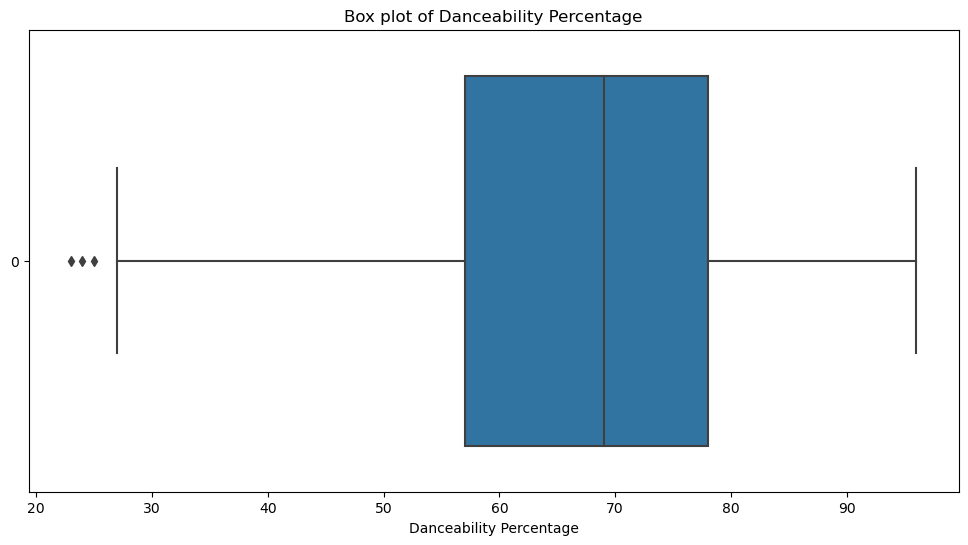

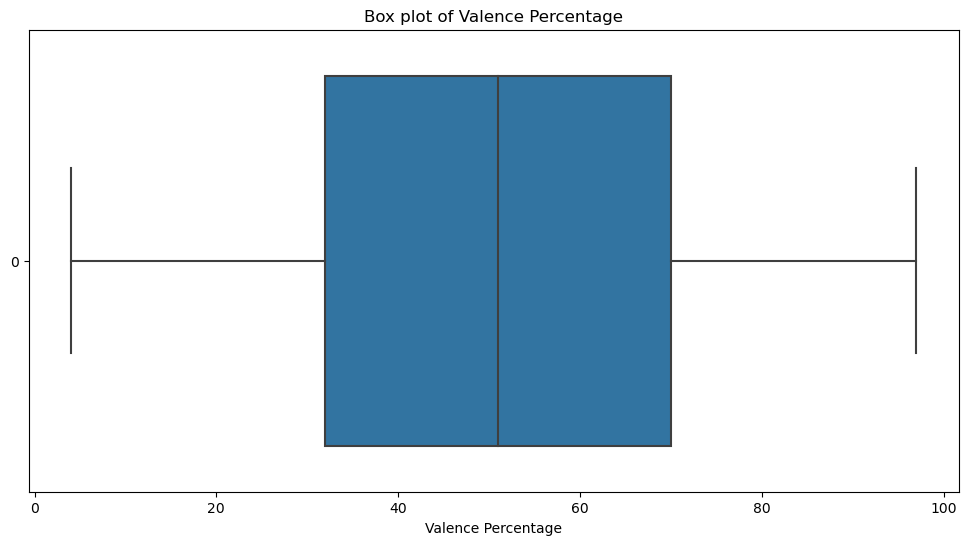

In [123]:
# Box-Plot
f = plt.figure(figsize=(12, 6))
sb.boxplot(data = sorted_data['danceability_%'], orient = "h")
plt.xlabel('Danceability Percentage')
plt.title('Box plot of Danceability Percentage')
plt.show()

f = plt.figure(figsize=(12, 6))
sb.boxplot(data = sorted_data['valence_%'], orient = "h")
plt.xlabel('Valence Percentage')
plt.title('Box plot of Valence Percentage')
plt.show()

# f = plt.figure(figsize=(12, 6))
# sb.boxplot(data = sorted_data['danceability_%'], orient = "h")
# plt.xlabel('Danceability Percentage')
# plt.title('Box plot of Danceability Percentage')
# plt.show()


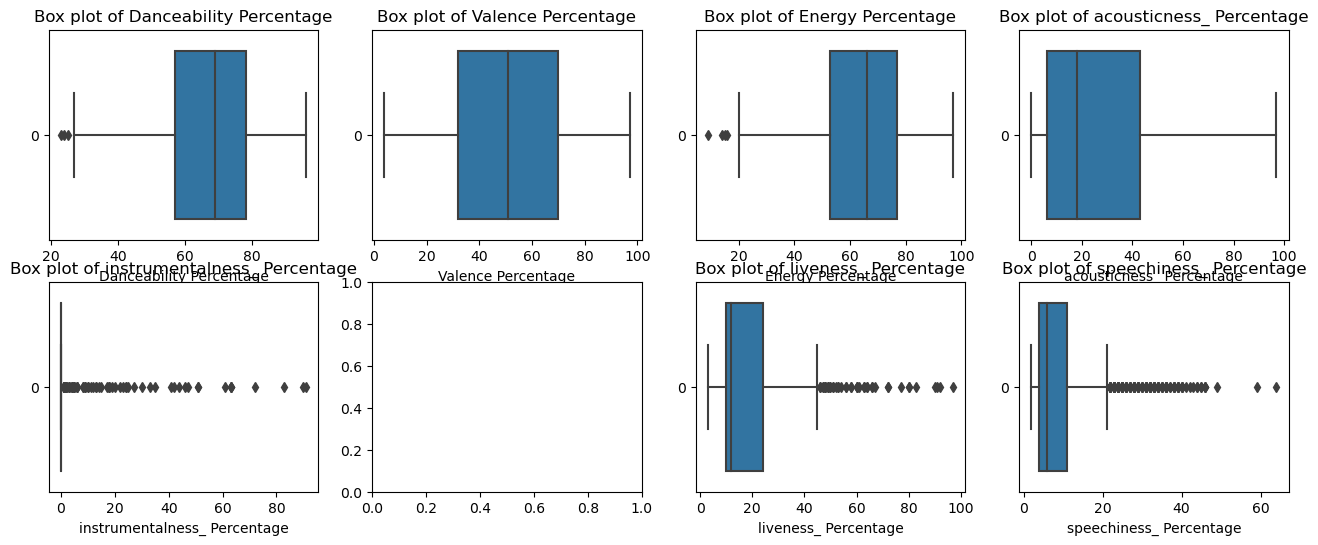

In [124]:
fig, axes = plt.subplots(2, 4, figsize=(16, 6))  

sb.boxplot(data=sorted_data['danceability_%'], orient="h", ax=axes[0, 0])
axes[0, 0].set_xlabel('Danceability Percentage')
axes[0, 0].set_title('Box plot of Danceability Percentage')

sb.boxplot(data=sorted_data['valence_%'], orient="h", ax=axes[0, 1])
axes[0, 1].set_xlabel('Valence Percentage')
axes[0, 1].set_title('Box plot of Valence Percentage')

sb.boxplot(data=sorted_data['energy_%'], orient="h", ax=axes[0, 2])
axes[0, 2].set_xlabel('Energy Percentage')
axes[0, 2].set_title('Box plot of Energy Percentage')

sb.boxplot(data=sorted_data['acousticness_%'], orient="h", ax=axes[0, 3])
axes[0, 3].set_xlabel('acousticness_ Percentage')
axes[0, 3].set_title('Box plot of acousticness_ Percentage')

sb.boxplot(data=sorted_data['instrumentalness_%'], orient="h", ax=axes[1, 0])
axes[1, 0].set_xlabel('instrumentalness_ Percentage')
axes[1, 0].set_title('Box plot of instrumentalness_ Percentage')

sb.boxplot(data=sorted_data['liveness_%'], orient="h", ax=axes[1, 2])
axes[1, 2].set_xlabel('liveness_ Percentage')
axes[1, 2].set_title('Box plot of liveness_ Percentage')

sb.boxplot(data=sorted_data['speechiness_%'], orient="h", ax=axes[1,3])
axes[1, 3].set_xlabel('speechiness_ Percentage')
axes[1, 3].set_title('Box plot of speechiness_ Percentage')

plt.show()


In [125]:
# sb.catplot(x = "streams", y = "danceability_%", data = sorted_data, kind = "box", height = 8)

# sb.catplot(x = "valence_%", y = "streams", data = sorted_data, kind = "box", height = 8)
# plt.xticks(rotation = 90)

C:\Users\sabar\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
C:\Users\sabar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\sabar\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)
C:\Users\sabar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


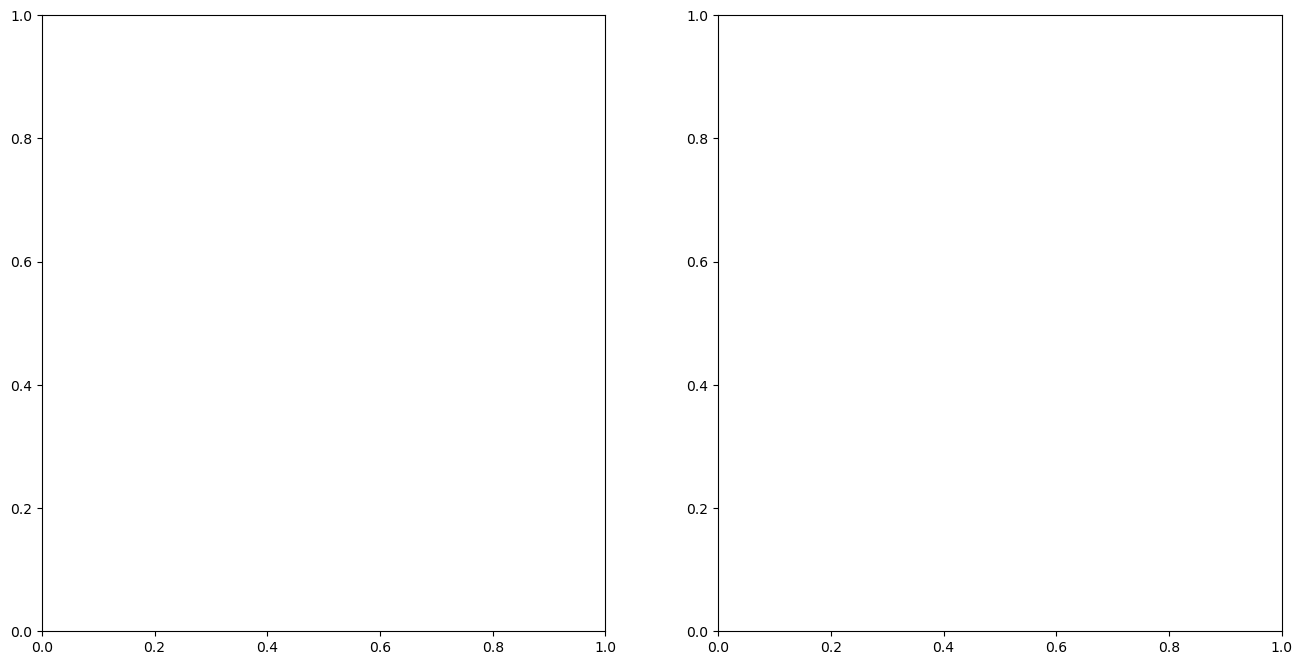

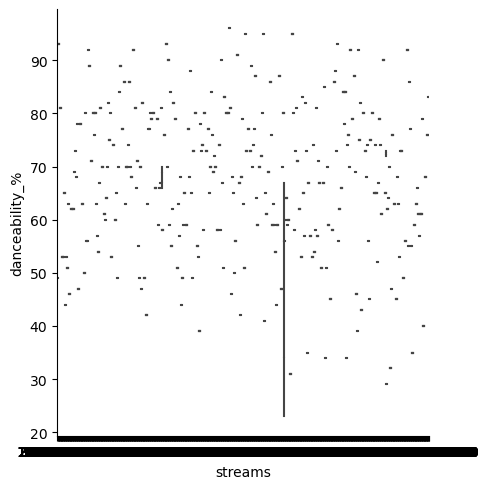

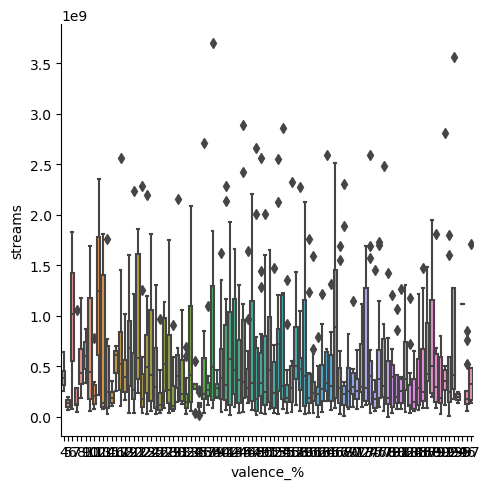

In [126]:
# Create a figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns

# Plot the first catplot on the first subplot
sb.catplot(x="streams", y="danceability_%", data=sorted_data, kind="box", ax=axes[0])

# Plot the second catplot on the second subplot
sb.catplot(x="valence_%", y="streams", data=sorted_data, kind="box", ax=axes[1])

# Remove the unnecessary blank space between subplots
plt.subplots_adjust(wspace=0.5)

# Show the plots
plt.show()

clean up: delete null rows, delete irrelevant columns

EDA: violin plot, remove outliers, correlation (heat map), 

In [127]:
for i in sorted_data:
    nulls = sorted_data[i].isnull().sum()
    print(f"Nulls for {i}: {nulls}")

Nulls for track_name: 0
Nulls for artist(s)_name: 0
Nulls for artist_count: 0
Nulls for released_year: 0
Nulls for released_month: 0
Nulls for released_day: 0
Nulls for in_spotify_playlists: 0
Nulls for in_spotify_charts: 0
Nulls for streams: 0
Nulls for in_apple_playlists: 0
Nulls for in_apple_charts: 0
Nulls for in_deezer_playlists: 0
Nulls for in_deezer_charts: 0
Nulls for in_shazam_charts: 50
Nulls for bpm: 0
Nulls for key: 95
Nulls for mode: 0
Nulls for danceability_%: 0
Nulls for valence_%: 0
Nulls for energy_%: 0
Nulls for acousticness_%: 0
Nulls for instrumentalness_%: 0
Nulls for liveness_%: 0
Nulls for speechiness_%: 0
